#### Linear Regression Example
##### Single variabe linear regression
 

In [1]:
import matplotlib.pyplot as plt
import numpy as np


(50,)


(0.0, 50.0)

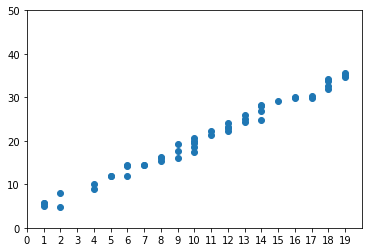

In [7]:
### y = b0 + b1 * x1
##  b0 intercepter, b1 slope
b1 = 1.7
b0 = 2.6

rng = np.random.RandomState(1)

### random 50 number from 1 to 20
x = rng.randint(1, 20, 50) 
print(x.shape)

##  create some noice by rng.rand(50)
y = b1 * x + rng.randn(50) + b0 

plt.scatter(x, y)
plt.xticks(range(20))
plt.xlim([0,20])
plt.ylim([0,50])


In [9]:
## training fit
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

X = x[:, np.newaxis]

# step 1: training
model.fit(X, y) # X is 2d, y is 1d

print(f"intercept: {model.intercept_},  b0: { b0 }") 
print(f"coefficient: {model.coef_},  slop b1 : { b1 }") 

intercept: 3.1560218768366255,  b0: 2.6
coefficient: [1.66290078],  slop b1 : 1.7


(0.0, 80.0)

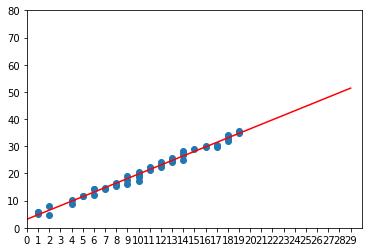

In [13]:
# step2: prediction
xfit = np.arange(30) # 1 to 10, array
Xfit = xfit[:, np.newaxis] # 2d 

yfit = model.predict(Xfit) # Xfit must be a 2d, yfit output is 1d

plt.scatter(x, y,)  # training points

plt.plot(xfit, yfit, color='red')

plt.xticks(range(30))
plt.xlim([0,30])
plt.ylim([0,80])


##  linear_model.LinearRegression


In [ ]:
##  class sklearn.linear_model.LinearRegression (fit_intercept=True, normalize=False, copy_X=True,n_jobs=None)

In [1]:
import json
with open("boston_house.json", 'r') as openfile:
    boston = json.load(openfile)

import pandas as pd
df = pd.DataFrame(boston['data'], columns=boston['feature_names']) 
df['PRICE'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [61]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = df['PRICE']       
                 
X.shape                 

(506, 13)

In [21]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420 )

In [25]:
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
    
print(Xtrain.shape, Ytrain.shape )

(354, 13) (354,)


In [27]:
lr = LinearRegression().fit(Xtrain, Ytrain)

yhat = lr.predict(Xtest)
##  print predict test point result y hat
yhat

array([ 8.91558391, 25.55486537, 29.74155255, 12.12945145,  6.43668754,
       21.39319329, 12.75310165, 17.24496996, 17.15344019, 13.10963383,
       22.83222588, 34.54734996, 20.53504518, 31.24735721, 22.13664807,
       13.17602085,  6.32280031, 28.96467423, 28.82286122, 30.56714102,
       20.51563911, 16.87715871, 25.39068188, 24.35431683, 20.7699537 ,
       13.63797749, 24.54344494, 19.85583948, 26.14184762, 20.08788971,
       33.13679454, 22.6950751 , 23.51238177, 25.10562854, 27.43104486,
       26.69863725, 12.59476455, 25.74808424, 19.49906272, 33.78183831,
       17.1876663 , 20.43701142, 32.58810206, 19.40788713,  8.50383004,
       31.30745564, 45.0313267 , 18.0494481 , 16.65134753, 35.84403485,
       27.79866726, 24.15231093, 20.05037188, 40.86609635, 33.21157772,
       27.67956144, 17.94177656, 23.31713349, 15.98940611, 18.91144811,
       18.48313192, 27.59270983, 17.5227453 , 32.75684359, 30.78735489,
       22.25703735, 23.31188035, 16.28667924, 23.85686338, 18.32

###  Look at the liner model

In [28]:
lr.coef_

array([-5.91360708e-02,  3.59005764e-02, -1.75848489e-02,  3.49991909e+00,
       -1.59154518e+01,  3.87516690e+00,  5.92507608e-03, -1.24195876e+00,
        3.20724778e-01, -1.38381096e-02, -9.18096657e-01,  1.19200101e-02,
       -5.13678354e-01])

In [66]:
[ *zip(Xtrain.columns, lr.coef_) ]

[('CRIM', -0.05913607075215423),
 ('ZN', 0.03590057638687004),
 ('INDUS', -0.017584848872367186),
 ('CHAS', 3.499919091188424),
 ('NOX', -15.915451753184056),
 ('RM', 3.875166896606913),
 ('AGE', 0.005925076080656046),
 ('DIS', -1.241958760118332),
 ('RAD', 0.3207247782109669),
 ('TAX', -0.013838109604696409),
 ('PTRATIO', -0.9180966565961706),
 ('B', 0.011920010121516363),
 ('LSTAT', -0.5136783537796983)]

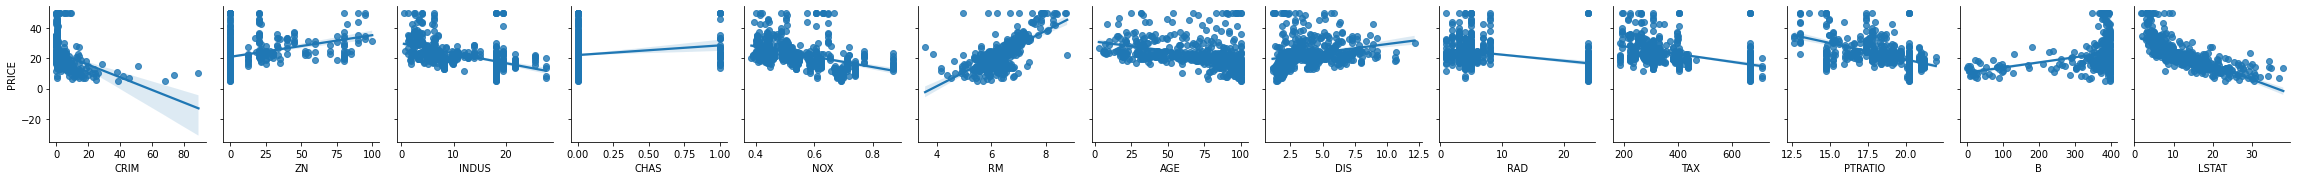

In [67]:
import seaborn as sns
sns.pairplot(df, x_vars=boston['feature_names'], y_vars=['PRICE'], kind='reg')

In [ ]:
###
#### Attribute Information (in order):
#### - CRIM     per capita crime rate by town
#### - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#### - INDUS    proportion of non-retail business acres per town
#### - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#### - NOX      nitric oxides concentration (parts per 10 million)
#### - RM       average number of rooms per dwelling
#### - AGE      proportion of owner-occupied units built prior to 1940
#### - DIS      weighted distances to five Boston employment centres
#### - RAD      index of accessibility to radial highways
#### - TAX      full-value property-tax rate per $10,000
#### - PTRATIO  pupil-teacher ratio by town
#### - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### - LSTAT    % lower status of the population

In [31]:
lr.intercept_

32.9776119322418

### Verify model accuray

In [32]:
##  1. MSE  ( Mean Squared Error)  1/n SUM ( ( y -y hat) ^ 2 )

In [38]:
from sklearn.metrics import mean_squared_error as MSE

print( MSE(yhat,Ytest) )



22.79492305385888
50.0 5.0


In [41]:
import sklearn
print(sorted(sklearn.metrics.SCORERS.keys()))

# cross_val_score(lr,X,y,cv=10,scoring="mean_squared_error")

cross_val_score(lr,X,y,cv=10,scoring="neg_mean_squared_error").mean()



['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


-34.705255944524936

In [42]:
##  2. MAE ( Mean Absolute ERROR   MAE = 1/n  SUM( abs (y - y hat))

In [43]:
cross_val_score(lr,X,y,cv=10,scoring="neg_mean_absolute_error").mean()

-4.004946635324001

In [44]:
###  3. R 2


In [46]:

from sklearn.metrics import r2_score
print ( r2_score( y_true = Ytest,  y_pred = yhat ) )

print( lr.score(Xtest,Ytest) )


0.7550352352974807
0.7550352352974807


In [50]:
cross_val_score(lr,X,y,cv=10,scoring="r2").mean()

0.20252899006055775

In [51]:
##  plot it

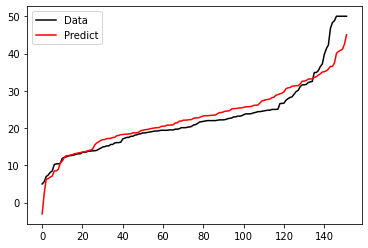

In [64]:
import matplotlib.pyplot as plt
sorted(Ytest)
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

In [53]:
## R 2 experiment

In [1]:
import numpy as np


rng = np.random.RandomState(40)

A = rng.randn(100, 80)
b = rng.randn(100)



In [2]:
print(A.shape, b.shape)

(100, 80) (100,)


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

cross_val_score( LinearRegression(),A,b,cv=10,scoring="r2")

array([-21.43339817, -20.4888612 , -67.66423951, -29.40636801,
        -8.93346132, -17.05563978, -15.19226547,  -7.15185721,
        -4.52203235,  -4.94687165])

In [ ]:
###  